#Data Science Career Track (Springboard/DataCamp)
#Topic:   Capstone Project - 911 Police Calls for Service EDA, (Baltimore, MD)
#Student: Franklin Cid
#Mentor:  Milad Toutounchian

## I. Data, Data Wrangling, and Setup

#0 Import packages and visualization libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#1 read 911 calls

In [2]:
c911 = pd.read_csv('Data/w911PoliceCalls_BaltimoreMD.csv')

In [3]:
#1a Check the data structure
c911.head(2)

,recordId,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,2749202,08/10/2017 03:25:00 PM,Low,ND,LARCENY,P172221666,3100 ST PAUL ST,"3100 ST PAUL ST\nBALTIMORE, MD\n(39.326142, -7..."
1,2785533,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE,P172351302,3300 BELAIR RD,"3300 BELAIR RD\nBALTIMORE, MD\n(39.321622, -76..."


In [4]:
c911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858058 entries, 0 to 3858057
Data columns (total 8 columns):
recordId            int64
callDateTime        object
priority            object
district            object
description         object
callNumber          object
incidentLocation    object
location            object
dtypes: int64(1), object(7)
memory usage: 235.5+ MB


#2 Pull c911 into a df, just including needed columns. Change column name 'description' to 'callType' (reason for the call).

In [5]:
df911 = pd.DataFrame(c911, columns=['callDateTime', 'priority', 'district', 'description'])
df911.columns = df911.columns.str.replace('description','callType')
df911.head(6) #chk

,callDateTime,priority,district,callType
0,08/10/2017 03:25:00 PM,Low,ND,LARCENY
1,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE
2,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE
3,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT
4,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC
5,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM


#3 Cast callDateTime => dateTime (no date fx available), new col=dT

In [6]:
#import timeit %timeit 
df911['dT'] =pd.to_datetime(df911.callDateTime)
df911.head(6) #chk run1 = 1:14 - 1:28  = 14 min

,callDateTime,priority,district,callType,dT
0,08/10/2017 03:25:00 PM,Low,ND,LARCENY,2017-08-10 15:25:00
1,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE,2017-08-23 12:53:00
2,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE,2017-08-07 18:57:00
3,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT,2017-08-18 21:05:00
4,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC,2015-06-27 15:12:00
5,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM,2017-08-23 10:09:00


In [7]:
#devMode: Optional. Will be removed once approved OK by mentor.

dev = 0 # [0, 1, 2]; 0=init, default 1=dev, 2=prod 
csvDT = 'Data/w911PoliceCalls_BaltimoreMD_dt.csv'
if dev == 0:
    df911.to_csv(csvDT, sep=',', encoding='utf-8')
if dev == 1:  #START HERE in this block
    c911 = pd.read_csv(csvDT, sep=',')
    cols =['callDateTime', 'priority', 'district', 'callType', 'dT']
    df911 = pd.DataFrame(c911, columns=cols)
else:
    dev = dev  #do NOTHING
    
df911dT = df911.copy()   # df911 = df911dT.copy()
df911dT.head(6) #chk run1 = 15-min; ? 2:36 - 2:52 = 16 min

,callDateTime,priority,district,callType,dT
0,08/10/2017 03:25:00 PM,Low,ND,LARCENY,2017-08-10 15:25:00
1,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE,2017-08-23 12:53:00
2,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE,2017-08-07 18:57:00
3,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT,2017-08-18 21:05:00
4,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC,2015-06-27 15:12:00
5,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM,2017-08-23 10:09:00


#4 Set the INDEX and SORT before filtering the target datasets.

In [8]:
df911.set_index('dT', drop=True)  #?
df911.sort_values(by='dT', inplace=True)
df911.head(6) #chk

,callDateTime,priority,district,callType,dT
1106565,01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,2015-01-01 00:01:00
357881,01/01/2015 12:01:00 AM,High,SW,Shooting,2015-01-01 00:01:00
359329,01/01/2015 12:01:00 AM,Low,SW,Other,2015-01-01 00:01:00
359125,01/01/2015 12:02:00 AM,Low,SW,Subject stop,2015-01-01 00:02:00
359340,01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,2015-01-01 00:02:00
358628,01/01/2015 12:02:00 AM,High,NE,Dischrg Firearm,2015-01-01 00:02:00


#5 Create needed columns for manipulating/grouping data later.
#Calculate the dateparts for yr, mo, and dy.
#Now, Drop callDateTime col.

In [9]:
df911['yr'] = ''; df911['mo'] = ''; df911['dy'] = ''
df911.yr = pd.DatetimeIndex(df911.dT).year
df911.mo = pd.DatetimeIndex(df911.dT).month
df911.dy = pd.DatetimeIndex(df911.dT).day
df911.tail() #chk

,callDateTime,priority,district,callType,dT,yr,mo,dy
2492563,10/10/2018 11:43:00 AM,Low,NE,ESCORT,2018-10-10 11:43:00,2018,10,10
2492696,10/10/2018 11:44:00 AM,Medium,ED,DISORDERLY,2018-10-10 11:44:00,2018,10,10
2492673,10/10/2018 11:44:00 AM,Low,NW,CHECKWELLBEING,2018-10-10 11:44:00,2018,10,10
2492546,10/10/2018 11:45:00 AM,Medium,NE,FAMILY DISTURB,2018-10-10 11:45:00,2018,10,10
2492589,10/10/2018 11:45:00 AM,High,NE,SILENT ALARM,2018-10-10 11:45:00,2018,10,10


In [10]:
#Drop callDateTime col now.
df911 = df911.drop('callDateTime', axis=1) #3858058 rows × 7 columns
df911.head() #chk

,priority,district,callType,dT,yr,mo,dy
1106565,High,NW,Dischrg Firearm,2015-01-01 00:01:00,2015,1,1
357881,High,SW,Shooting,2015-01-01 00:01:00,2015,1,1
359329,Low,SW,Other,2015-01-01 00:01:00,2015,1,1
359125,Low,SW,Subject stop,2015-01-01 00:02:00,2015,1,1
359340,High,SW,Dischrg Firearm,2015-01-01 00:02:00,2015,1,1


In [11]:
#6 #Data wrangle: df911
##6a Filter: 01/2015 - 12/2017 (3 full years)
##6b Empty/NaN/NULL 
##6c Uppercase/Lowercase - make all callTypes Upper()
##6d Data error - Mistype, extra space 
##6e Work only on top 5 district - dfDistrict (Jan/2015, Jan/2016, Jan/2017)
##6f Work only on top 4 priority - dfPriority (3 full years of 2015, 2016, 2017)
##6g Work only on top 5 callType - dfCallType (Jan/2015, Jan/2016, Jan/2017)

In [12]:
df911.info() #(3858058, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3858058 entries, 1106565 to 2492589
Data columns (total 7 columns):
priority    object
district    object
callType    object
dT          datetime64[ns]
yr          int64
mo          int64
dy          int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 235.5+ MB


In [13]:
##6a Filter: 01/2015 - 12/2017 (3 full years)
df911 = df911.loc[(df911.dT >= '2015-01') & (df911.dT < '2018-01')]  ##zap!
df911.tail()

,priority,district,callType,dT,yr,mo,dy
3083878,Low,CD,OTHER,2017-12-31 23:58:00,2017,12,31
873473,Non-Emergency,NE,Business Check,2017-12-31 23:58:00,2017,12,31
140102,Medium,NE,FAMILY DISTURB,2017-12-31 23:58:00,2017,12,31
2161528,Medium,ND,DISORDERLY,2017-12-31 23:59:00,2017,12,31
3125919,Medium,SE,911/NO VOICE,2017-12-31 23:59:00,2017,12,31


In [14]:
##6b Empty/NaN/NULL   #priority missing(NULL) = #3123855 -3117200 =6655
dfPnull = df911[df911.priority.isnull()]
dfPnull.head()

,priority,district,callType,dT,yr,mo,dy
3253354,NaN,SW,BURGLARY,2015-04-27 11:13:00,2015,4,27
3362416,NaN,SE,COMMON ASSAULT,2015-04-27 11:14:00,2015,4,27
3249583,NaN,NW,ROBBERY ARMED,2015-04-27 11:23:00,2015,4,27
23652,NaN,NW,PURSE SNATCH,2015-04-27 11:24:00,2015,4,27
1106645,NaN,NW,PURSE SNATCH,2015-04-27 11:24:00,2015,4,27


In [15]:
##6b Empty/NaN/NULL 
#Get unique list of callTypes with counts. Focus on Top 10
dfPnull.callType.value_counts().head(10)

COMMON ASSAULT     1883
BURGLARY           1106
DISORDERLY          708
ARMED PERSON        338
AGGRAV ASSAULT      296
LARCENCY            253
DESTRUCT PROPTY     253
DISCHRG FIREARM     216
FAMILY DISTURB      203
HIT AND RUN         104
Name: callType, dtype: int64

In [16]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='COMMON ASSAULT']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
COMMON ASSAULT,322,8,132771,33


In [17]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='BURGLARY']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
BURGLARY,120,2,63489,9


In [18]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='DISORDERLY']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency,Out of Service
callType,,,,,
DISORDERLY,258,5,269150,1,1


In [19]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> High
dfPnull10 = df911[df911.callType =='ARMED PERSON']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Medium,Out of Service
callType,,,
ARMED PERSON,23986,5,1


In [20]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> High
dfPnull10 = df911[df911.callType =='AGGRAV ASSAULT']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
AGGRAV ASSAULT,22561,2,32,5


In [21]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Low
dfPnull10 = df911[df911.callType =='LARCENCY'] #LARCENY
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency,Out of Service
callType,,,,,
LARCENCY,20,27283,1399,3,130


In [22]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Low
dfPnull10 = df911[df911.callType =='DESTRUCT PROPTY']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Out of Service
callType,,,,
DESTRUCT PROPTY,12,21849,863,12


In [23]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> High
dfPnull10 = df911[df911.callType =='DISCHRG FIREARM']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High
callType,
DISCHRG FIREARM,8404


In [24]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Medium
dfPnull10 = df911[df911.callType =='FAMILY DISTURB']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency
callType,,,,
FAMILY DISTURB,55,2,76383,1


In [25]:
##6b Empty/NaN/NULL #Determine what priority is likely for this callType >>> Low
dfPnull10 = df911[df911.callType =='HIT AND RUN']
pd.crosstab (dfPnull10.callType, dfPnull10.priority)

priority,High,Low,Medium,Non-Emergency,Out of Service
callType,,,,,
HIT AND RUN,44,55422,1723,2,2


In [26]:
##6b2 Empty/NaN/NULL 
#Now, set those priority Null values to those observed above.
cList = ['COMMON ASSAULT','BURGLARY','DISORDERLY','ARMED PERSON','AGGRAV ASSAULT', 
            'LARCENCY','DESTRUCT PROPTY','DISCHRG FIREARM','FAMILY DISTURB','HIT AND RUN']
cPrio = ['Medium','Medium','Medium', 'High','High',
         'Low','Low', 'High','Medium','Low']
for ii in range(10):
    rx = (df911.callType == cList[ii]) & df911.priority.isnull()
    df911.loc[rx, 'priority'] = cPrio[ii]

In [27]:
dfPnull = df911[df911.priority.isnull()] #Empty/NaN/NULL ; 3562 >> 1295 = not part of the top 10 above
dfPnull.callType.value_counts().head(10) #priority NaN =#3123855 -3122560 =6655; 3123855>>3122560
#SUSPICIOUS PERS     102  COMMON ASSAULT     1883
#ROBBERY ARMED        98  BURGLARY           1106
#NARCOTICSOutside     94  DISORDERLY          708
#SILENT ALARM         86  ARMED PERSON        338
#AUTO THEFT           72  AGGRAV ASSAULT      296
#AUTO ACCIDENT        70  LARCENCY            253
#LARCENY F/AUTO       62  DESTRUCT PROPTY     253
#MENTAL CASE          53  DISCHRG FIREARM     216
#JUV DISTURBANCE      49  FAMILY DISTURB      203
#DWI                  45  HIT AND RUN         104

SUSPICIOUS PERS     102
ROBBERY ARMED        98
NARCOTICSOutside     94
SILENT ALARM         86
AUTO THEFT           72
AUTO ACCIDENT        70
LARCENY F/AUTO       62
MENTAL CASE          53
JUV DISTURBANCE      49
DWI                  45
Name: callType, dtype: int64

##6c Uppercase/Lowercase, extra spaces, wrong spelling - make all CallTypes Upper() #chk re#
##6d Data error (priority = ['Out of Service', 'Emergency'])
##6e Work only on top 5 district
##6f Work only on top 4 priority 
##6g Work only on top 5 callType

In [28]:
##6c Uppercase/Lowercase, extra spaces, wrong spelling, data entry error #CHK RE##
df911.callType = df911.callType.str.upper()

df911.callType = df911.callType.str.replace("LARCENCY", "LARCENY") #
df911.callType = df911.callType.str.replace("  ", " ") #608034, 237, 7 >>> 3x
df911.callType = df911.callType.str.replace("  ", " ") #608034, 237, 7 >>> 3x
df911.callType = df911.callType.str.replace("  ", " ") #608034, 237, 7 >>> 3x

In [29]:
##6d Data error (priority = ['Out of Service', 'Emergency']) #
df911 = df911[df911.priority !='Out of Service']        #need to drop this priority r=880
df911.priority.replace('Emergency','High',inplace=True) #re-tag as High. r=492913+1120 =494033 High

df911.callType.value_counts().head(5) #chk

911/NO VOICE      528054
DISORDERLY        281392
TRAFFIC STOP      185930
COMMON ASSAULT    140869
AUTO ACCIDENT     131088
Name: callType, dtype: int64

#### Base df = df911
##6e dfDistrict. Top 5 district only: [01/2015, 01/2016, 01/2017]=highest priority call/dist
##6f dfPriority. Top 4 priority only: [01/2015 - 12/2017]
##6g dfCallType. Top 5 callType only: [01/2015, 01/2016, 01/2017]

In [30]:
##6e dfDistrict. Top 5 district: [01/2015, 01/2016, 01/2017] = highest priority call/district
df9115 = df911.loc[(df911.dT >= '2015-01') & (df911.dT < '2015-02')] # 83994;
df9116 = df911.loc[(df911.dT >= '2016-01') & (df911.dT < '2016-02')] # 80087; 
df9117 = df911.loc[(df911.dT >= '2017-01') & (df911.dT < '2017-02')] # 84422; 
df9117.shape #chk (84422, 7), priority 3122560/3123855

(84404, 7)

In [31]:
dfCallTypeDist = pd.concat([df9115, df9116, df9117]) # 248503 [01/2015, 01/2016, 01/2017]

dfCallType = pd.DataFrame(dfCallTypeDist, columns=['callType', 'priority', 'district','yr', 'dy'])

dfDistrict = pd.DataFrame(dfCallTypeDist, columns=['priority', 'district','yr', 'dy'])
dfDistrict =dfDistrict[dfDistrict.priority =='High'] #ONLY need HIGH. dfDistrict=BASIS
dfDistrict.head() #chk

,priority,district,yr,dy
1106565,High,NW,2015,1
357881,High,SW,2015,1
359340,High,SW,2015,1
358628,High,NE,2015,1
360087,High,WD,2015,1


In [32]:
##6e Check dfDistrict shape, and the top 9 of each year (2015, 2016, 2017)
dfDistrict.shape # (248503, 5) >>>(37852, 4) High only 37790, for Top 9 = (37671, 4)

(37852, 4)

In [33]:
##6e By observation, there are 4 districts ['CW','INFO','SS','TRU'] with insignificant values.
#Remove the lowest 4 districts from the set and work on the top 9 districts.
pd.crosstab(dfDistrict.yr, dfDistrict.district, rownames=['Jan/Year'], 
        colnames=['District'], margins=True, margins_name='<TOTAL>')

#!use dfDistrict[dfDistrict.yr==2015].district.value_counts().head(9)
#XXX dfDistrict.district.value_counts() = ^sorted

District,CD,CW,ED,INFO,ND,NE,NW,SD,SE,SS,SW,TRU,WD,<TOTAL>
Jan/Year,,,,,,,,,,,,,,
2015,714,19,639,0,966,1150,813,823,806,16,758,0,607,7311
2016,1567,18,1404,4,1509,2447,1335,1595,2122,18,1335,1,1400,14755
2017,1589,21,1414,0,1478,2221,1320,1872,2251,21,1728,1,1870,15786
<TOTAL>,3870,58,3457,4,3953,5818,3468,4290,5179,55,3821,2,3877,37852


In [34]:
# Most <High> Priority Calls/District for 3 Years on the Month of January
dfDistrict = dfDistrict[~dfDistrict.district.isin(['CW','INFO','SS','TRU'])]
dfCT = pd.crosstab(dfDistrict.yr, dfDistrict.district, rownames=['Jan/Year'], 
        colnames=['District'], margins=True, margins_name='<TOTAL>')
dfCT

District,CD,ED,ND,NE,NW,SD,SE,SW,WD,<TOTAL>
Jan/Year,,,,,,,,,,
2015,714,639,966,1150,813,823,806,758,607,7276
2016,1567,1404,1509,2447,1335,1595,2122,1335,1400,14714
2017,1589,1414,1478,2221,1320,1872,2251,1728,1870,15743
<TOTAL>,3870,3457,3953,5818,3468,4290,5179,3821,3877,37733


In [35]:
# Most <High> Priority Calls/District for 3 Years on the Month of January.
dfDistrict.pivot_table(index=['yr'], columns=['district'], values=['priority']
    , aggfunc='count', fill_value=0) # Pivot table validates ok.

priority                                                
district       CD    ED    ND    NE    NW    SD    SE    SW    WD
yr                                                               
2015          714   639   966  1150   813   823   806   758   607
2016         1567  1404  1509  2447  1335  1595  2122  1335  1400
2017         1589  1414  1478  2221  1320  1872  2251  1728  1870

##6f Top 4 priority for 3 years: [01/2015 - 12/2017], priority district callType dT yr mo dy

In [36]:
##6f dfPriority. Top 4 priority: (3122975, 7)
dfPriority = df911.copy() 
dfPriority.shape

(3122975, 7)

In [37]:
dfPriority.priority.value_counts()
#Medium            1561149 1559689
#Low                705902 706512
#High               492913 494883
#Non-Emergency      360596 360596
#Emergency            1120
#Out of Service        880

Medium           1559689
Low               706512
High              494883
Non-Emergency     360596
Name: priority, dtype: int64

In [38]:
##6f Need to make a decision here: 
###1) Drop all priority='Out of Service', 
###2) Move priority 'Emergency' to the 'High' bin. 

dfPriority = dfPriority[dfPriority.priority !='Out of Service']  # r=880 
dfPriority.priority.value_counts()

Medium           1559689
Low               706512
High              494883
Non-Emergency     360596
Name: priority, dtype: int64

In [39]:
##6f ###2) Move priority 'Emergency' to the 'High' bin. 
dfPriority.priority.replace('Emergency', 'High', inplace=True)   # r=492913 + 1120 = 494033 High
dfPriority.priority.value_counts()

Medium           1559689
Low               706512
High              494883
Non-Emergency     360596
Name: priority, dtype: int64

[Text(0,0.5,'No. of Calls'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'No. of Police Calls/Year Grouped by Priority')]

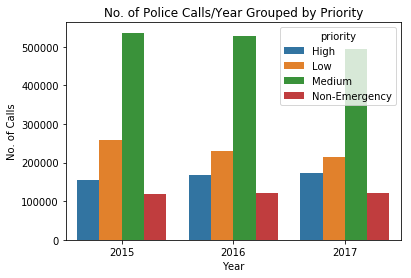

In [40]:
##6f Top 4 priority: [01/2015 - 12/2017], crosstab
ct = pd.crosstab(dfPriority.yr, dfPriority.priority)
tt = 'No. of Police Calls/Year Grouped by Priority'
stacked = ct.stack().reset_index().rename(columns={0:'val'})
bp = sns.barplot(x=stacked.yr, y=stacked.val, hue=stacked.priority)
bp.set(xlabel='Year', ylabel='No. of Calls', title=tt)

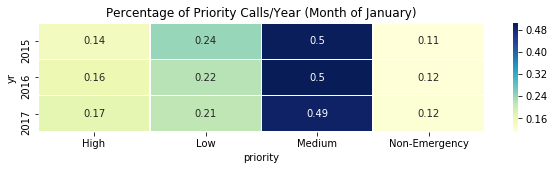

In [41]:
tt = 'Percentage of Priority Calls/Year (Month of January)'
ct = pd.crosstab(index=[dfPriority.yr], columns=dfPriority.priority,
            rownames=['Year'], colnames=['Priority'])
plt.figure(figsize=(10,2))
plt.title(tt)

ax = sns.heatmap(pd.crosstab([dfPriority.yr], [dfPriority.priority], normalize='index')
    , yticklabels=1, cmap="YlGnBu", annot=True, cbar=True, linewidths=.5)

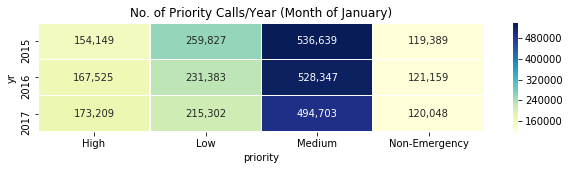

In [42]:
tt = 'No. of Priority Calls/Year (Month of January)'
plt.figure(figsize=(10,2))
plt.title(tt)
ax = sns.heatmap(pd.crosstab([dfPriority.yr], [dfPriority.priority]), yticklabels=1
    , cmap="YlGnBu", annot=True, cbar=True, linewidths=.5, fmt=',.0f', cbar_kws={'format': '%.0f'})

##6f Monthly Calls/Year Grouped by Priority

In [43]:
dfPcounts = dfPriority.groupby(['yr','mo','priority']).count().head(9) # <<<<<<<<<<<<<<
dfPcounts ### NOT ideal for graphs. CANNOT Pull part of the multi-index as criteria/filter

district  callType     dT     dy
yr   mo priority                                       
2015 1  High               7311      7311   7311   7311
        Low               28262     28262  28262  28262
        Medium            36870     36870  36870  36870
        Non-Emergency     11414     11414  11414  11414
     2  High               6330      6330   6330   6330
        Low               28912     28912  28912  28912
        Medium            32589     32589  32589  32589
        Non-Emergency     11741     11741  11741  11741
     3  High              16345     16345  16345  16345

In [44]:
df15 = dfPriority[dfPriority.yr==2015]
df15c = pd.crosstab(df15.mo, df15.priority)
df15c['TOTAL'] = df15c.High + df15c.Medium + df15c.Low + df15c['Non-Emergency']

df16 = dfPriority[dfPriority.yr==2016]
df16c = pd.crosstab(df16.mo, df16.priority)
df16c['TOTAL'] = df16c.High + df16c.Medium + df16c.Low + df16c['Non-Emergency']

df17 = dfPriority[dfPriority.yr==2017]
df17c = pd.crosstab(df17.mo, df17.priority)
df17c['TOTAL'] = df17c.High + df17c.Medium + df17c.Low + df17c['Non-Emergency']
df15c

priority,High,Low,Medium,Non-Emergency,TOTAL
mo,,,,,
1,7311,28262,36870,11414,83857
2,6330,28912,32589,11741,79572
3,16345,19488,40132,10218,86183
4,15892,19743,45225,9178,90038
5,10497,21136,48668,8495,88796
6,12361,21323,50206,9720,93610
7,13899,21385,52104,10093,97481
8,14015,21002,50465,10226,95708
9,13523,20724,48706,10279,93232


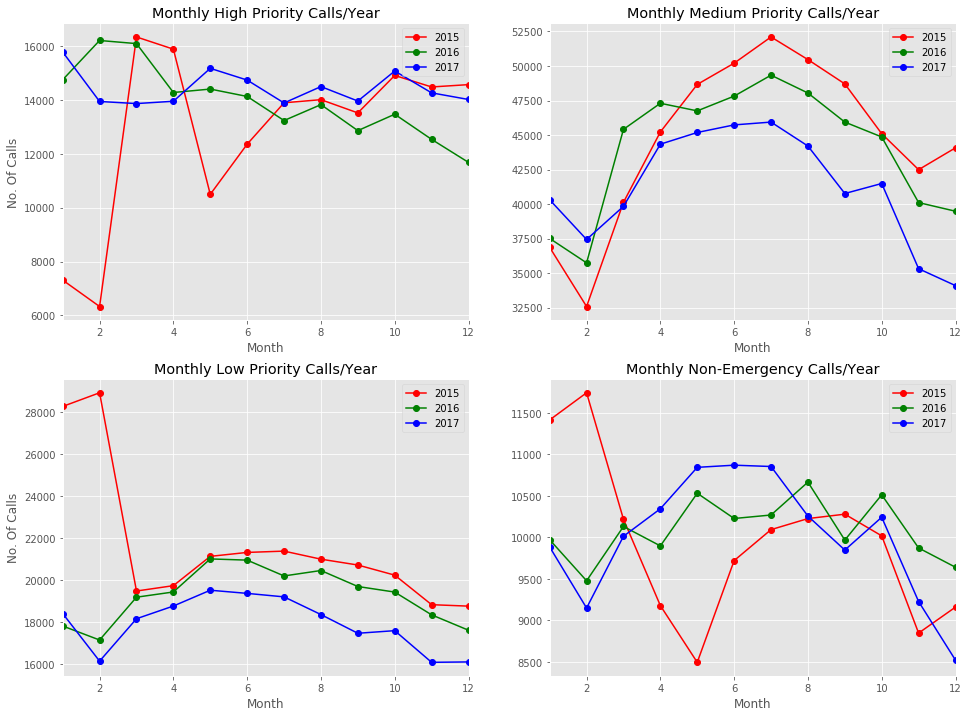

In [45]:
#Monthly Calls/Year Grouped by Priority
#=================================================
plt.style.use('ggplot')
plt.figure(figsize=(16,12))

#High Priority Calls 
#=================================================
plt.subplot(2,2,1)
plt.title('Monthly High Priority Calls/Year')
plt.plot(df15c.index, df15c.High, color='red', marker='o', label='2015')
plt.plot(df16c.index, df16c.High, color='green', marker='o', label='2016')
plt.plot(df17c.index, df17c.High, color='blue', marker='o', label='2017')
plt.xlabel('Month')
plt.ylabel('No. Of Calls')
plt.xlim(1, 12)
plt.legend(loc='upper right')

#Medium Priority Calls 
#=================================================
plt.subplot(2, 2, 2)
plt.title('Monthly Medium Priority Calls/Year')
plt.plot(df15c.index, df15c.Medium, color='red', marker='o', label='2015')
plt.plot(df16c.index, df16c.Medium, color='green', marker='o', label='2016')
plt.plot(df17c.index, df17c.Medium, color='blue', marker='o', label='2017')
plt.xlabel('Month')
plt.xlim(1, 12)
plt.legend(loc='upper right')

#Low Priority Calls 
#=================================================
plt.subplot(2, 2, 3)
plt.title('Monthly Low Priority Calls/Year')
plt.plot(df15c.index, df15c.Low, color='red', marker='o', label='2015')
plt.plot(df16c.index, df16c.Low, color='green', marker='o', label='2016')
plt.plot(df17c.index, df17c.Low, color='blue', marker='o', label='2017')
plt.xlabel('Month')
plt.ylabel('No. Of Calls')
plt.xlim(1, 12)
plt.legend(loc='upper right')

#Non-Emergency Calls 
#=================================================
plt.subplot(2, 2, 4)
plt.title('Monthly Non-Emergency Calls/Year')
plt.plot(df15c.index, df15c['Non-Emergency'], color='red', marker='o', label='2015')
plt.plot(df16c.index, df16c['Non-Emergency'], color='green', marker='o', label='2016')
plt.plot(df17c.index, df17c['Non-Emergency'], color='blue', marker='o', label='2017')
plt.xlabel('Month')
plt.xlim(1, 12)
plt.legend(loc='upper right')
#plt.savefig('Data/xlim_and_ylim.png')
#plt.show()

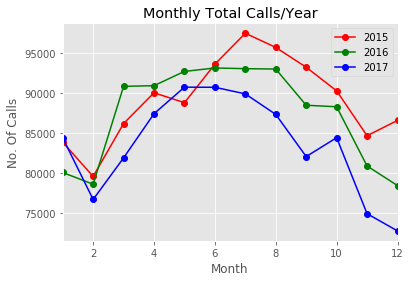

In [46]:
#Monthly Total Calls 
#=================================================
plt.title('Monthly Total Calls/Year')
plt.plot(df15c.index, df15c.TOTAL, color='red', marker='o', label='2015')
plt.plot(df16c.index, df16c.TOTAL, color='green', marker='o', label='2016')
plt.plot(df17c.index, df17c.TOTAL, color='blue', marker='o', label='2017')
plt.xlabel('Month')
plt.ylabel('No. Of Calls')
plt.xlim(1, 12)
plt.legend(loc='upper right')

##6g dfCallType. Work only on top 5 callType
###At this point, df911 has been wrangled already on the callType values which 
#affected the priority totals. So, from 6e,...

In [47]:
##from 6e, Work only on top 5 callType: [01/2015, 01/2016, 01/2017], #SUB: #32: Cleaned up from df911
#dfCallTypeDist = pd.concat([df9115, df9116, df9117]) # 248503 [01/2015, 01/2016, 01/2017]
#dfCallType = pd.DataFrame(dfCallTypeDist, columns=['callType', 'priority', 'district','yr', 'dy'])
#dfCallType.shape = wrangled #(3123855, 7)

dfCallType.callType.value_counts().head(5)  #shape=(248503, 5) #top 5
# 911/NO VOICE=42105 TRAFFIC STOP=22486 DISORDERLY=19108 COMMON ASSAULT=10380 AUTO ACCIDENT=9855

911/NO VOICE      42105
TRAFFIC STOP      22486
DISORDERLY        19106
COMMON ASSAULT    10363
AUTO ACCIDENT      9852
Name: callType, dtype: int64

In [48]:
ctList = ['911/NO VOICE','TRAFFIC STOP','DISORDERLY','COMMON ASSAULT','AUTO ACCIDENT']
dfCallType = dfCallType[dfCallType.callType.isin(ctList)] #shape=(103934, 5)
dfCallType.callType.value_counts()  #chk, just the top 5

911/NO VOICE      42105
TRAFFIC STOP      22486
DISORDERLY        19106
COMMON ASSAULT    10363
AUTO ACCIDENT      9852
Name: callType, dtype: int64

In [49]:
ct = pd.crosstab(dfCallType.yr, dfCallType.callType, rownames=['Jan_Year'], colnames=['CallType'])
ct  #chk. Top 5 callType:   <<<END>>> #priority district callType dT yr mo dy.

CallType,911/NO VOICE,AUTO ACCIDENT,COMMON ASSAULT,DISORDERLY,TRAFFIC STOP
Jan_Year,,,,,
2015,15935,3002,3141,5877,9449
2016,13449,3317,3431,6506,6557
2017,12721,3533,3791,6723,6480


[Text(0,0.5,'No. of Calls'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'No. of Police Calls/Year (Month of January) Grouped by CallType')]

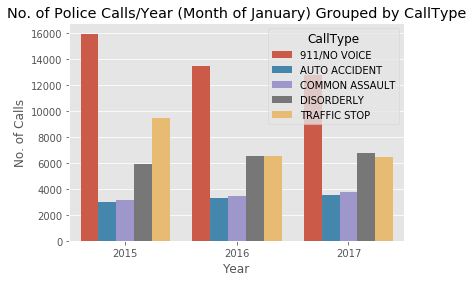

In [50]:
tt = 'No. of Police Calls/Year (Month of January) Grouped by CallType'
stacked = ct.stack().reset_index().rename(columns={0:'val'})
bp = sns.barplot(x=stacked.Jan_Year, y=stacked.val, hue=stacked.CallType)
bp.set(xlabel='Year', ylabel='No. of Calls', title=tt)

## END END WRANGLE
## END END WRANGLE

##  911PoliceCalls4Svc.EDA.wrangle.ipynb <END

## <END> 911PoliceCalls4Svc.EDA.wrangle.ipynb <END